In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

x.shape, y.shape

((1797, 64), (1797,))

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=233)

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA()
pca.fit(x_train)

PCA()

In [5]:
pca.explained_variance_

array([1.81007327e+02, 1.62245915e+02, 1.41965678e+02, 1.00238468e+02,
       6.81939314e+01, 5.82192560e+01, 5.35849636e+01, 4.34003952e+01,
       4.15334270e+01, 3.77412998e+01, 2.95411763e+01, 2.76709665e+01,
       2.14874615e+01, 2.08074313e+01, 1.75469989e+01, 1.69582705e+01,
       1.61421830e+01, 1.51283885e+01, 1.24902934e+01, 1.10196270e+01,
       1.07320199e+01, 9.44840594e+00, 9.09439397e+00, 8.93322578e+00,
       8.46944961e+00, 7.04767976e+00, 6.87546962e+00, 6.31807832e+00,
       5.77351989e+00, 5.18995665e+00, 4.56492303e+00, 4.35442033e+00,
       4.10520804e+00, 3.82441709e+00, 3.72901451e+00, 3.49442464e+00,
       3.17239040e+00, 2.76786099e+00, 2.63864629e+00, 2.57068504e+00,
       2.24762050e+00, 1.85158687e+00, 1.76138992e+00, 1.70038358e+00,
       1.42366072e+00, 1.27843954e+00, 1.13785918e+00, 8.59404411e-01,
       6.72480430e-01, 4.70872656e-01, 3.01051638e-01, 9.86926152e-02,
       6.68544406e-02, 6.52619492e-02, 5.04686299e-02, 1.88299040e-02,
      

In [6]:
pca.explained_variance_ratio_

array([1.50332671e-01, 1.34750688e-01, 1.17907268e-01, 8.32514175e-02,
       5.66373528e-02, 4.83530495e-02, 4.45041138e-02, 3.60454873e-02,
       3.44949075e-02, 3.13454184e-02, 2.45349402e-02, 2.29816680e-02,
       1.78460592e-02, 1.72812712e-02, 1.45733726e-02, 1.40844138e-02,
       1.34066257e-02, 1.25646353e-02, 1.03736086e-02, 9.15217073e-03,
       8.91330333e-03, 7.84721880e-03, 7.55319995e-03, 7.41934435e-03,
       7.03416265e-03, 5.85333498e-03, 5.71030867e-03, 5.24737647e-03,
       4.79510238e-03, 4.31043349e-03, 3.79132205e-03, 3.61649248e-03,
       3.40951329e-03, 3.17630697e-03, 3.09707192e-03, 2.90223715e-03,
       2.63477688e-03, 2.29880161e-03, 2.19148445e-03, 2.13504036e-03,
       1.86672439e-03, 1.53780515e-03, 1.46289355e-03, 1.41222573e-03,
       1.18239809e-03, 1.06178702e-03, 9.45030304e-04, 7.13764257e-04,
       5.58517607e-04, 3.91075572e-04, 2.50033507e-04, 8.19675350e-05,
       5.55248606e-05, 5.42022429e-05, 4.19158939e-05, 1.56388684e-05,
      

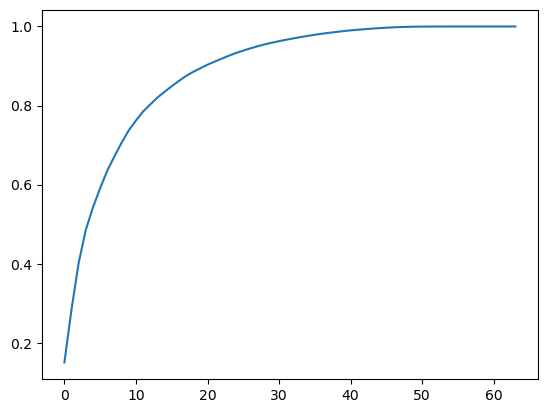

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [8]:
pca = PCA(0.9)
pca.fit(x_train)
pca.n_components_

21

In [9]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [10]:
x_train_pca.shape, x_test_pca.shape

((1347, 21), (450, 21))

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', tol=0.001, max_iter=500, random_state=233)

In [12]:
%%time
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

CPU times: total: 828 ms
Wall time: 521 ms


0.9622222222222222

In [13]:
%%time
clf.fit(x_train_pca, y_train)
clf.score(x_test_pca, y_test)

CPU times: total: 766 ms
Wall time: 225 ms


0.9555555555555556

## 可视化

In [14]:
pca = PCA(2)
pca.fit(x_train)
x_pca_2d = pca.transform(x_test)

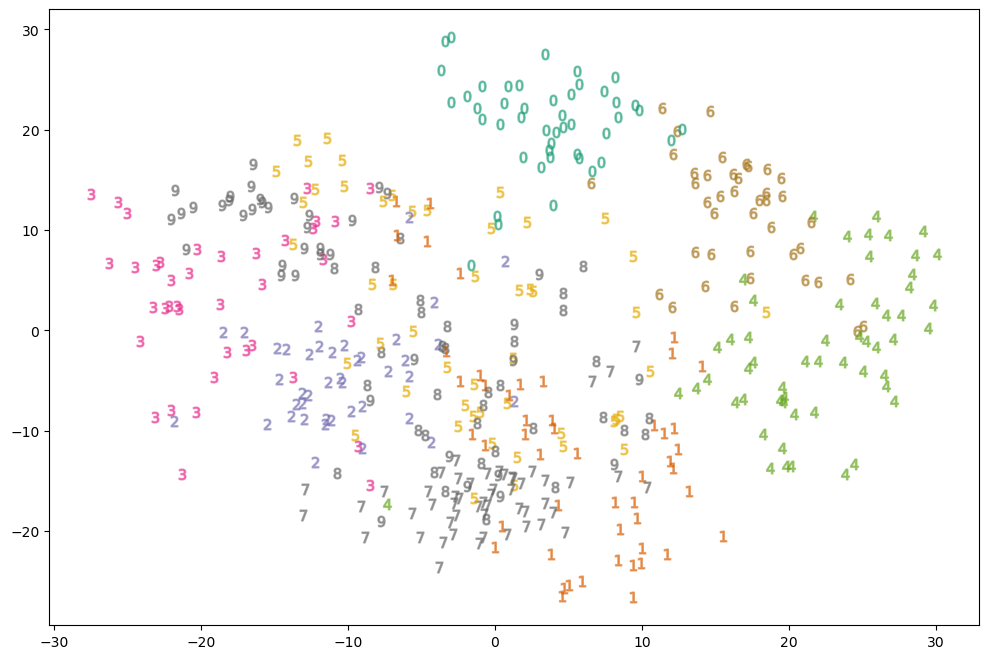

In [15]:
plt.rcParams['figure.figsize'] = (12, 8)
for i, digit in enumerate(y_test):
    plt.scatter(x_pca_2d[i, 0], x_pca_2d[i, 1], color = plt.cm.Dark2(digit), marker = '${0}$'.format(digit), s = 60, alpha = 0.5)
plt.show()